In [2]:
from dotenv import load_dotenv
from langgraph.graph import StateGraph , START, END
from typing import TypedDict
from model import model
load_dotenv()

True

In [3]:
model = model

In [16]:
#this is the state of the langgraph
class BlogState(TypedDict):
    title : str
    outline: str
    content: str

In [17]:
def create_outline(state: BlogState):
    
    title = state['title']

    #call the model
    prompt = f'Generate a detailed outline for a blog on the topic - {title}'
    outline = model.invoke(prompt).content

    state['outline'] = outline

    return state

In [18]:
def create_blog(state: BlogState):

    outline = state['outline']
    title = state['title']

    prompt = f'Write a detailed blog on the title - {title} using the follwing outline \n {outline}'

    content = model.invoke(prompt).content

    state['content'] = content  

    return state

In [22]:
graph = StateGraph(BlogState)

# node of the graph
graph.add_node('create_outline', create_outline)
graph.add_node('create_blog', create_blog)

# edges of the graph
graph.add_edge(START, 'create_outline')
graph.add_edge('create_outline', 'create_blog')
graph.add_edge('create_blog', END)

workflow = graph.compile()

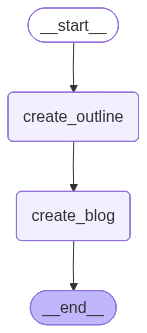

In [23]:
workflow

In [24]:
initial_state = {
    'title':'The future of AI in healthcare'
    }

In [26]:
final_state = workflow.invoke(initial_state)

In [27]:
final_state

{'title': 'The future of AI in healthcare',
 'outline': 'Here\'s a detailed outline for a blog post on "The Future of AI in Healthcare," designed to be engaging, informative, and comprehensive.\n\n---\n\n## Blog Title Options:\n*   **The AI Revolution in Medicine: A Glimpse into Healthcare\'s Future**\n*   **Beyond the Hype: How AI is Reshaping Healthcare as We Know It**\n*   **From Diagnosis to Discovery: Charting the Future of AI in Healthcare**\n*   **The Doctor Will See You Now (with AI\'s Help): Healthcare\'s Intelligent Tomorrow**\n\n---\n\n## **I. Introduction (Approx. 150-200 words)**\n\n*   **A. Engaging Hook:**\n    *   Start with a compelling statistic about healthcare challenges (e.g., rising costs, physician burnout, diagnostic errors) or a futuristic scenario (e.g., "Imagine a world where diseases are detected before symptoms appear...").\n    *   Briefly acknowledge the current buzz around AI.\n*   **B. Setting the Stage: AI\'s Current Footprint (Briefly)**\n    *   Ment

In [28]:
final_state['outline']

'Here\'s a detailed outline for a blog post on "The Future of AI in Healthcare," designed to be engaging, informative, and comprehensive.\n\n---\n\n## Blog Title Options:\n*   **The AI Revolution in Medicine: A Glimpse into Healthcare\'s Future**\n*   **Beyond the Hype: How AI is Reshaping Healthcare as We Know It**\n*   **From Diagnosis to Discovery: Charting the Future of AI in Healthcare**\n*   **The Doctor Will See You Now (with AI\'s Help): Healthcare\'s Intelligent Tomorrow**\n\n---\n\n## **I. Introduction (Approx. 150-200 words)**\n\n*   **A. Engaging Hook:**\n    *   Start with a compelling statistic about healthcare challenges (e.g., rising costs, physician burnout, diagnostic errors) or a futuristic scenario (e.g., "Imagine a world where diseases are detected before symptoms appear...").\n    *   Briefly acknowledge the current buzz around AI.\n*   **B. Setting the Stage: AI\'s Current Footprint (Briefly)**\n    *   Mention existing, nascent applications (e.g., basic data ana